## **Problem Description**
### what is my goal?
my goal is to create model capable of detecting fraud in credit card operations because it has a lot of damaged value when it happened.
### what do I want to predict?
the value that I want to predicted in this case is by using model in many parameters to show fraud accuracy with balanced and high performances data.
### what are variables?
The input variables are numeric, shown in Principal Component Analysis(PCA) form due to confidentallly issues

The variables that have not been transformed with the PCA are 'Time' and 'Amount' variables.

The response variable is 'Class' value that has value "1"(fraud) and "0"(Not Fraud)

## **Data Exploration**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

In [ ]:
filename = '/content/creditcard 2.csv'
df = pd.read_csv(filename)

In [ ]:
print(df.shape)
print(len(df))

(284807, 31)
284807


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
print ('Percentage of Not Fraud = ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 0].describe(),2))
print ()
print ()
print ('Percentage of Fraud  = ',round(df['Class'].value_counts()[1]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 1].describe(),2))

Percentage of Not Fraud =  99.83

count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64


Percentage of Fraud  =  0.17

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64


<ipython-input-8-8ea849edcd14>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(), palette=["C2", "C2"])


Text(0.5, 0, '0: Non Fraud,  1: Fraud')

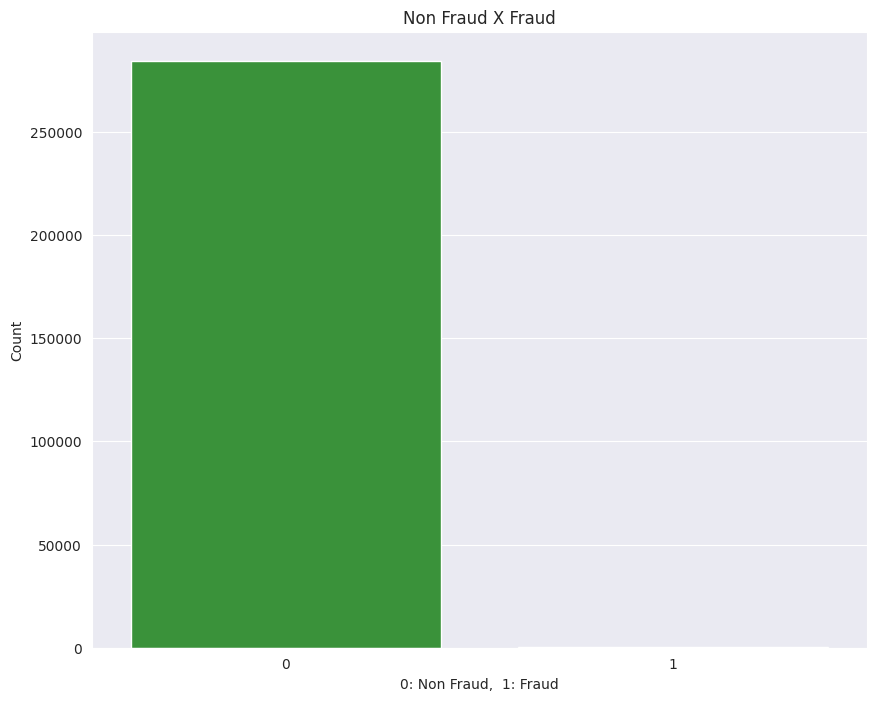

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.barplot(x=df['Class'].value_counts().index,y=df['Class'].value_counts(), palette=["C2", "C2"])
plt.title('Non Fraud X Fraud')
plt.ylabel('Count')
plt.xlabel('0: Non Fraud,  1: Fraud')

<ipython-input-9-4866b0ae016f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
<ipython-input-9-4866b0ae016f>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


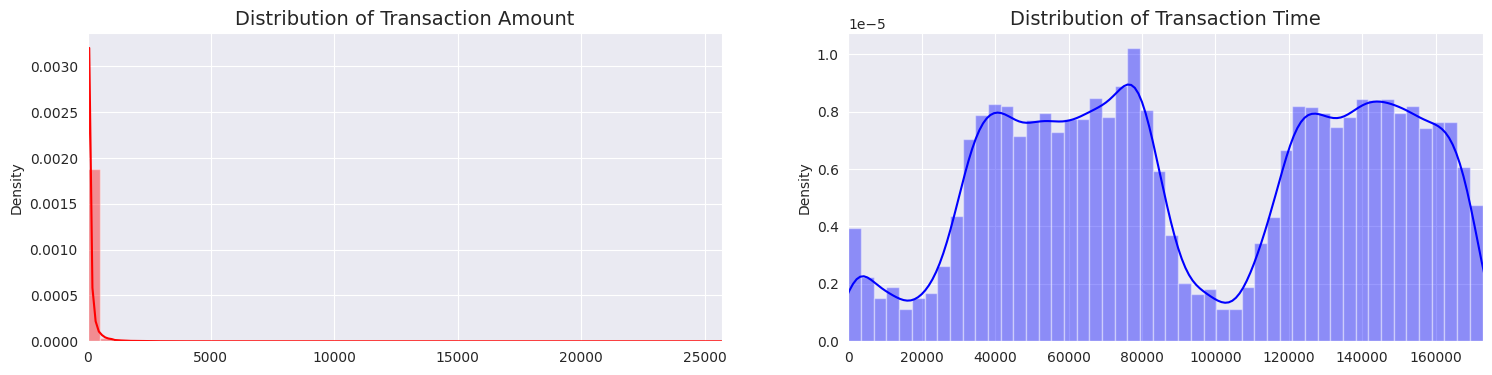

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

#Show money values
sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

#Show Time period
sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

## **Data Preprocessing**

In [ ]:
scale = StandardScaler()

df['scaled_amount'] = scale.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scale.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Amount'], axis=1, inplace=True)
df.drop(['Time'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount'], axis=1, inplace=True)
df.drop(['scaled_time'], axis=1, inplace=True)

df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

#insertไว้ที่columnแรกๆ

In [ ]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## **Original Model with Logistic Regression**

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [ ]:
X=df.drop('Class',axis=1)
y=df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.70, random_state = 1)

In [ ]:
X_train.shape, X_test.shape

((199364, 30), (85443, 30))

In [ ]:
y_train.shape, y_test.shape

((199364,), (85443,))

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
print("Logistic Regression : ")
print("recall", metrics.recall_score(y_test, y_pred))
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))

Logistic Regression : 
recall 0.5851851851851851
accuracy 0.99916903666772
precision 0.8404255319148937


In [ ]:
conf = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', conf)

Confusion Matrix: 
 [[85293    15]
 [   56    79]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.84      0.59      0.69       135

    accuracy                           1.00     85443
   macro avg       0.92      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443



### **Conclusion with original model**

Even though accuracy is excellent, but the algorithm is wrongly classified.

--> 85293 transactions classified as normal in predicted and reality

--> 15 transactions classified as fraud in reality but normal in predicted (Type1 error)

--> 56 transactions classified as normal in reality but fraud in predicted (Type2 error)

--> 79 transactions classified as fraud in predicted and reality

Accuracy in a highly unbalanced data set does not represent a correct value for the efficiency of a model as we see in recall metrics.

So, the **Modelling strategy** should **balance the data** before taking into model and evaluation metrics.


# **Dealing with Unbalanced data**

## **Feature Selection**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_validate, StratifiedKFold
from sklearn.linear_model import LinearRegression,Lasso, Ridge, RidgeCV , LassoCV

In [ ]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=200)
scoring = 'recall'
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

lasso = LogisticRegression(penalty='l1',solver='liblinear',max_iter=200)
ridge = LogisticRegression(penalty='l2',max_iter=200)


cv_results_logistic = cross_validate(logr, X_train, y_train, cv=skf, scoring=scoring)
cv_results_lasso = cross_validate(lasso, X_train, y_train, cv=skf, scoring=scoring)
cv_results_ridge = cross_validate(ridge, X_train, y_train, cv=skf, scoring=scoring)


In [ ]:
cv_results_logistic.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [ ]:
print('r2 of Linear :', cv_results_logistic['test_score'])
print("Mean r2: ", np.mean(cv_results_logistic['test_score']))

print('r2 of Lasso :', cv_results_lasso['test_score'])
print("Mean r2: ", np.mean(cv_results_lasso['test_score']))

print('r2 of Ridge :', cv_results_ridge['test_score'])
print("Mean r2: ", np.mean(cv_results_ridge['test_score']))

r2 of Linear : [0.67605634 0.69014085 0.69444444 0.54166667 0.57746479]
Mean r2:  0.6359546165884193
r2 of Lasso : [0.67605634 0.70422535 0.72222222 0.54166667 0.6056338 ]
Mean r2:  0.6499608763693271
r2 of Ridge : [0.67605634 0.69014085 0.69444444 0.54166667 0.57746479]
Mean r2:  0.6359546165884193


In [ ]:
lasso.fit(X_train, y_train)
y_pred_test = lasso.predict(X_test)
recall = metrics.recall_score(y_test, y_pred_test)
print("recall on test set : ", recall)

recall on test set :  0.5777777777777777


จะเห็นว่า recall หลังการทำ lasso จะน้อยลง
แต่ในด้าน r2 จะเพิ่มขึ้น ทำให้ค่า correlation ระหว่าง features ดีขึ้น

In [ ]:
selected_columns = X_train.columns[lasso.coef_[0] != 0]

X_train_lasso = X_train[selected_columns]
X_test_lasso = X_test[selected_columns]

X_train_lasso_df = pd.DataFrame(X_train_lasso, columns=selected_columns)
X_test_lasso_df = pd.DataFrame(X_test_lasso, columns=selected_columns)

X_train_lasso_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V17,V19,V20,V21,V22,V23,V25,V26,V27,V28
191125,-0.295777,0.722500,-0.190075,0.203323,-0.996232,-1.596985,3.192579,3.356935,0.288299,0.895003,...,-0.337180,-0.033013,-0.007496,-0.170599,-0.619724,0.039651,-0.160870,0.274825,-0.010541,0.022199
153710,-0.317247,0.107125,-0.000313,1.041633,-0.318849,-0.429824,0.927591,-0.784796,0.815404,-0.175950,...,0.757110,-0.480573,-0.284525,0.160884,0.681572,-0.313216,-0.077819,-0.218129,-0.095776,0.037814
261216,-0.345313,1.370937,2.065603,0.071537,-1.892041,0.190985,0.681571,-0.286226,0.051364,-0.040737,...,0.064331,0.527165,-0.148721,-0.348255,-0.947148,0.270988,-0.234159,0.185280,-0.069232,-0.046179
190724,-0.334838,0.719068,2.025587,0.060125,-1.843486,0.347168,0.301427,-0.955263,0.073910,-0.137681,...,0.148204,-0.083757,-0.262006,0.219107,0.722795,-0.054034,0.212825,-0.091711,-0.011126,-0.047441
127492,-0.165839,-0.346716,-0.482824,0.692865,1.397751,0.822699,-0.815530,0.143287,-0.419970,0.605203,...,-0.204127,1.765153,0.207773,0.255948,0.566025,0.161260,-1.055243,0.503132,0.069006,0.112114


In [ ]:
X_train_lasso_df.shape, X_test_lasso_df.shape

((199364, 28), (85443, 28))

In [ ]:
X_train_lasso_df.columns

Index(['scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V19', 'V20', 'V21', 'V22', 'V23', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

จะเห็นว่า V18 , V24 ถูกตัดออกจากการทำ Feature Selection

การทำ Ridge Regularization ควรช่วย ลดความ overfitting ของโมเดล

Ridge ไม่สามารถกำจัด negative correlation ได้โดยตรงเพราะมันไม่ได้บีบ**ค่าสัมประสิทธิ์ให้เป็น 0 เหมือน Lasso**

## **Random Undersampling**

In [ ]:
df_lasso = df.drop(['V18','V24'], axis=1)

lasso_X = df_lasso.drop('Class', axis=1)
lasso_y = df_lasso['Class']

In [ ]:
lasso_y.shape, lasso_X.shape

((284807,), (284807, 28))

In [ ]:
X_train_lasso2, X_test_lasso2, y_train_lasso2, y_test_lasso2 = train_test_split(lasso_X, lasso_y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

In [ ]:
undersample = RandomUnderSampler(sampling_strategy=1, random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train_lasso2, y_train_lasso2)

In [ ]:
models = [
    {"name": "LogisticRegression",
     "model": LogisticRegression(),
     "params": {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    },
    {"name": "KNearest",
     "model": KNeighborsClassifier(),
     "params": {"n_neighbors": list(range(2, 5))}
    },
    {"name": "Support Vector Classifier",
     "model": SVC(),
     "params": {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
    },
    {"name": "Decision Tree Classifier",
     "model": DecisionTreeClassifier(),
     "params": {"max_depth": list(range(2, 4)), "min_samples_leaf": list(range(5, 7))}
    }
]

In [ ]:
results = []

scoring = {'accuracy': 'accuracy', 'recall': 'recall'}

for model_info in models:
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring=scoring, refit='recall', verbose=1)
    grid_search.fit(X_train_under, y_train_under)
    best_model = grid_search.best_estimator_

    best_cv_recall = grid_search.cv_results_['mean_test_recall'][grid_search.best_index_]
    best_cv_accuracy = grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]

    results.append({
        "Model": model_info['name'],
        "Best Estimator": best_model,
        "Best CV Recall Score": best_cv_recall,
        "Best CV Accuracy Score": best_cv_accuracy
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


,Model,Best Estimator,Best CV Recall Score,Best CV Accuracy Score
0,LogisticRegression,LogisticRegression(C=1),0.904773,0.935467
1,KNearest,KNeighborsClassifier(n_neighbors=3),0.885055,0.928405
2,Support Vector Classifier,"SVC(C=0.7, kernel='linear')",0.907512,0.936856
3,Decision Tree Classifier,"DecisionTreeClassifier(max_depth=3, min_sample...",0.873865,0.903122


In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

best_params = {'C': 1, 'max_iter': 200}
log_reg_balanced = LogisticRegression(**best_params)
log_reg_balanced.fit(X_train_under, y_train_under)

y_pred_unbalanced = log_reg_balanced.predict(X_test_lasso2)

recall_unbalanced = recall_score(y_test_lasso2, y_pred_unbalanced)
precision_unbalanced = precision_score(y_test_lasso2, y_pred_unbalanced)
accuracy_unbalanced = accuracy_score(y_test_lasso2, y_pred_unbalanced)

print("Best Parameters:", best_params)
print("Recall on original data:", recall_unbalanced)
print("Precision on original data:", precision_unbalanced)
print("Accuracy on original data:", accuracy_unbalanced)
print("\nClassification Report (Original Data):\n", classification_report(y_test_lasso2, y_pred_unbalanced))

Best Parameters: {'C': 1, 'max_iter': 200}
Recall on original data: 0.9338235294117647
Precision on original data: 0.03739693757361602
Accuracy on original data: 0.9616352422082558

Classification Report (Original Data):
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.93      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443



การใช้ random undersampling จะช่วยให้โมเดลมีประสิทธิภาพในการจำแนกตัวอย่างของคลาสที่มีน้อย (minority class) ได้ดีขึ้น ซึ่งส่งผลให้:

Recall สำหรับคลาสที่มีน้อยจะสูงขึ้น** เนื่องจากโมเดลได้เรียนรู้จากตัวอย่างที่มีน้อยมากขึ้นหลังการ undersampling

Precision อาจลดลงเล็กน้อย เนื่องจากบางตัวอย่างในคลาสที่มีมาก (majority class) ถูกสุ่มออก ทำให้ข้อมูลในคลาสนี้มีน้อยลง

Accuracy อาจลดลงเนื่องจากสัดส่วนข้อมูลที่เป็นคลาสที่มีมาก (ส่วนใหญ่ถูกตัดออก) ไม่สามารถให้โมเดลจำแนกได้ดีเหมือนเดิม

เปรียบเทียบกับการทำ Logistic Regression แบบธรรมดา:
หากไม่ทำ random undersampling ค่า accuracy จะสูงขึ้นเพราะโมเดลอาจเน้นไปที่การจำแนกคลาสที่มีมาก แต่ recall ของคลาสที่มีน้อย จะลดลง เนื่องจากโมเดลไม่สามารถจำแนกตัวอย่างที่มีจำนวนน้อยได้ดี

## **SMOTE**

เมื่อใช้เทคนิค SMOTE สำหรับการทำ oversampling กับข้อมูลที่ไม่สมดุล

1.ช่วยเพิ่มจำนวนข้อมูลในกลุ่มน้อยโดยการสร้างตัวอย่างใหม่

2.ช่วยปรับปรุง accuracy และ recall

3.มักแสดงประสิทธิภาพที่ดีกว่าในด้านการจำแนกประเภทของกลุ่มน้อย

4.ทำให้โมเดลมีความสามารถในการทำนายที่สูงขึ้นในทั้งสองคลาส

Link : https://www.kaggle.com/discussions/general/424270

In [ ]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_lasso2, y_train_lasso2)

scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test_lasso2)

log_reg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [200]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, scoring='recall', cv=5)
grid_log_reg.fit(X_train_smote_scaled, y_train_smote)
best_log_reg_smote = grid_log_reg.best_estimator_

In [ ]:
y_pred_smote = best_log_reg_smote.predict(X_test_scaled)

smote_accuracy = accuracy_score(y_test_lasso2, y_pred_smote)
smote_recall = recall_score(y_test_lasso2, y_pred_smote)
smote_precision = precision_score(y_test_lasso2, y_pred_smote)

print("Best Parameters from GridSearchCV:", grid_log_reg.best_params_)
print("SMOTE Accuracy Score:", smote_accuracy)
print("SMOTE Recall Score:", smote_recall)
print("SMOTE Precision Score:", smote_precision)
print("\nClassification Report (SMOTE):\n", classification_report(y_test_lasso2, y_pred_smote))

Best Parameters from GridSearchCV: {'C': 100, 'max_iter': 200}
SMOTE Accuracy Score: 0.9731985066067437
SMOTE Recall Score: 0.9264705882352942
SMOTE Precision Score: 0.05236907730673317

Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



# **Conclusion**

จากการเปรียบเทียบระหว่าง Original Logistic Regression , Random UnderSampling และ SMOTE :

**Original Logistic Regression**
มีค่า Accuracy ที่ดีที่สุด แต่การตรวจจับคนโกงนั้นจะทำได้น้อยกว่าเนื่องจากมีข้อมูล class ที่ไม่สมดุลกัน จึงแม่นยำในการตรวจจับคนไม่โกงไปเยอะ จับคนโกงจริงได้น้อย

**Random UnderSampling**:
จะมีค่า Recall มากที่สุด เนื่องจากโมเดลได้เรียนรู้จากตัวอย่างที่มีการสุ่มตัวอย่างขึ้นมา นั่นจึงทำให้ Accuracy ลดลงมาบ้างเนื่องจากคลาสที่มีมากในโมเดล(คนไม่โกง)ถูกคัดออกส่วนใหญ่ ทำให้ข้อมูลคลาสน้อยลง แต่มันก็ทำให้ Precision น้อยลงมากเช่นกัน

**SMOTE (Oversampling)**:
จะมีค่า Recall ที่ดี เนื่องจากโมเดลได้เรียนรู้จากตัวอย่างที่มีการสุ่มตัวอย่างขึ้นมาจากคลาสที่น้อยกว่าให้เท่ากับคลาสที่มีมากกว่า ให้สมดุลกัน นั่นจึงทำให้ Accuracy ลดลงมาบ้างเนื่องจากคลาสที่มีน้อยในโมเดล(คนโกง)ถูกเพิ่มเข้ามาส่วนใหญ่ ทำให้ข้อมูลคลาสมากขึ้น แต่มันก็ทำให้ Precision น้อยลงมากเช่นกัน




In [ ]:
# Logistic Regression
y_pred_ori = lr.predict(X_test)

accuracy_ori = accuracy_score(y_test, y_pred)
recall_ori = recall_score(y_test, y_pred)
precision_ori = precision_score(y_test, y_pred)

# Logistic Regression with Under-Sampling

y_pred_unbalanced = log_reg_balanced.predict(X_test_lasso2)

recall_unbalanced = recall_score(y_test_lasso2, y_pred_unbalanced)
precision_unbalanced = precision_score(y_test_lasso2, y_pred_unbalanced)
accuracy_unbalanced = accuracy_score(y_test_lasso2, y_pred_unbalanced)

# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE)

y_pred_smote = best_log_reg_smote.predict(X_test_scaled)

smote_accuracy = accuracy_score(y_test_lasso2, y_pred_smote)
smote_recall = recall_score(y_test_lasso2, y_pred_smote)
smote_precision = precision_score(y_test_lasso2, y_pred_smote)

d = {'Technique': ['Logistic Regression','Random UnderSampling', 'Oversampling (SMOTE)'],
     'Accuracy Score': [accuracy_ori,accuracy_unbalanced, smote_accuracy],
     'Recall Score': [recall_ori,recall_unbalanced, smote_recall],
     'Precision Score': [precision_ori,precision_unbalanced, smote_precision]}

final_df = pd.DataFrame(data=d)
final_df

,Technique,Accuracy Score,Recall Score,Precision Score
0,Logistic Regression,0.999169,0.585185,0.840426
1,Random UnderSampling,0.961635,0.933824,0.037397
2,Oversampling (SMOTE),0.973199,0.926471,0.052369


## **Improvement Plan**

ใช้ Auto ML ในการ generate เผื่อจะได้ค่า metrics ที่ต้องการจาก classifiers ตัวอื่นๆ

ใช้ Neural Network เพื่อเปรียบเทียบ Under VS Over (ศึกษาเพิ่มเติม)

ใช้วิธีการในการจัดการ Feature ที่มีผลต่อ Class ได้